<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/ensayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend1022.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)

In [56]:
#@title Analisis rapidos del data_set
a=np.array(round(df.FQI161.describe(),2))
b=np.array(round(df.PIR161.describe(),2))
c=np.array(round(df.FQI165.describe(),2))
d=np.array(round(df.FQI169.describe(),2))
e=np.array(round(df.FQI177.describe(),2))
f=np.array(round(df.FQI173.describe(),2))
g=np.array(round(df.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )


TABLA1(dfD)

Analisis rapidos.


array([[12],
       [13]])

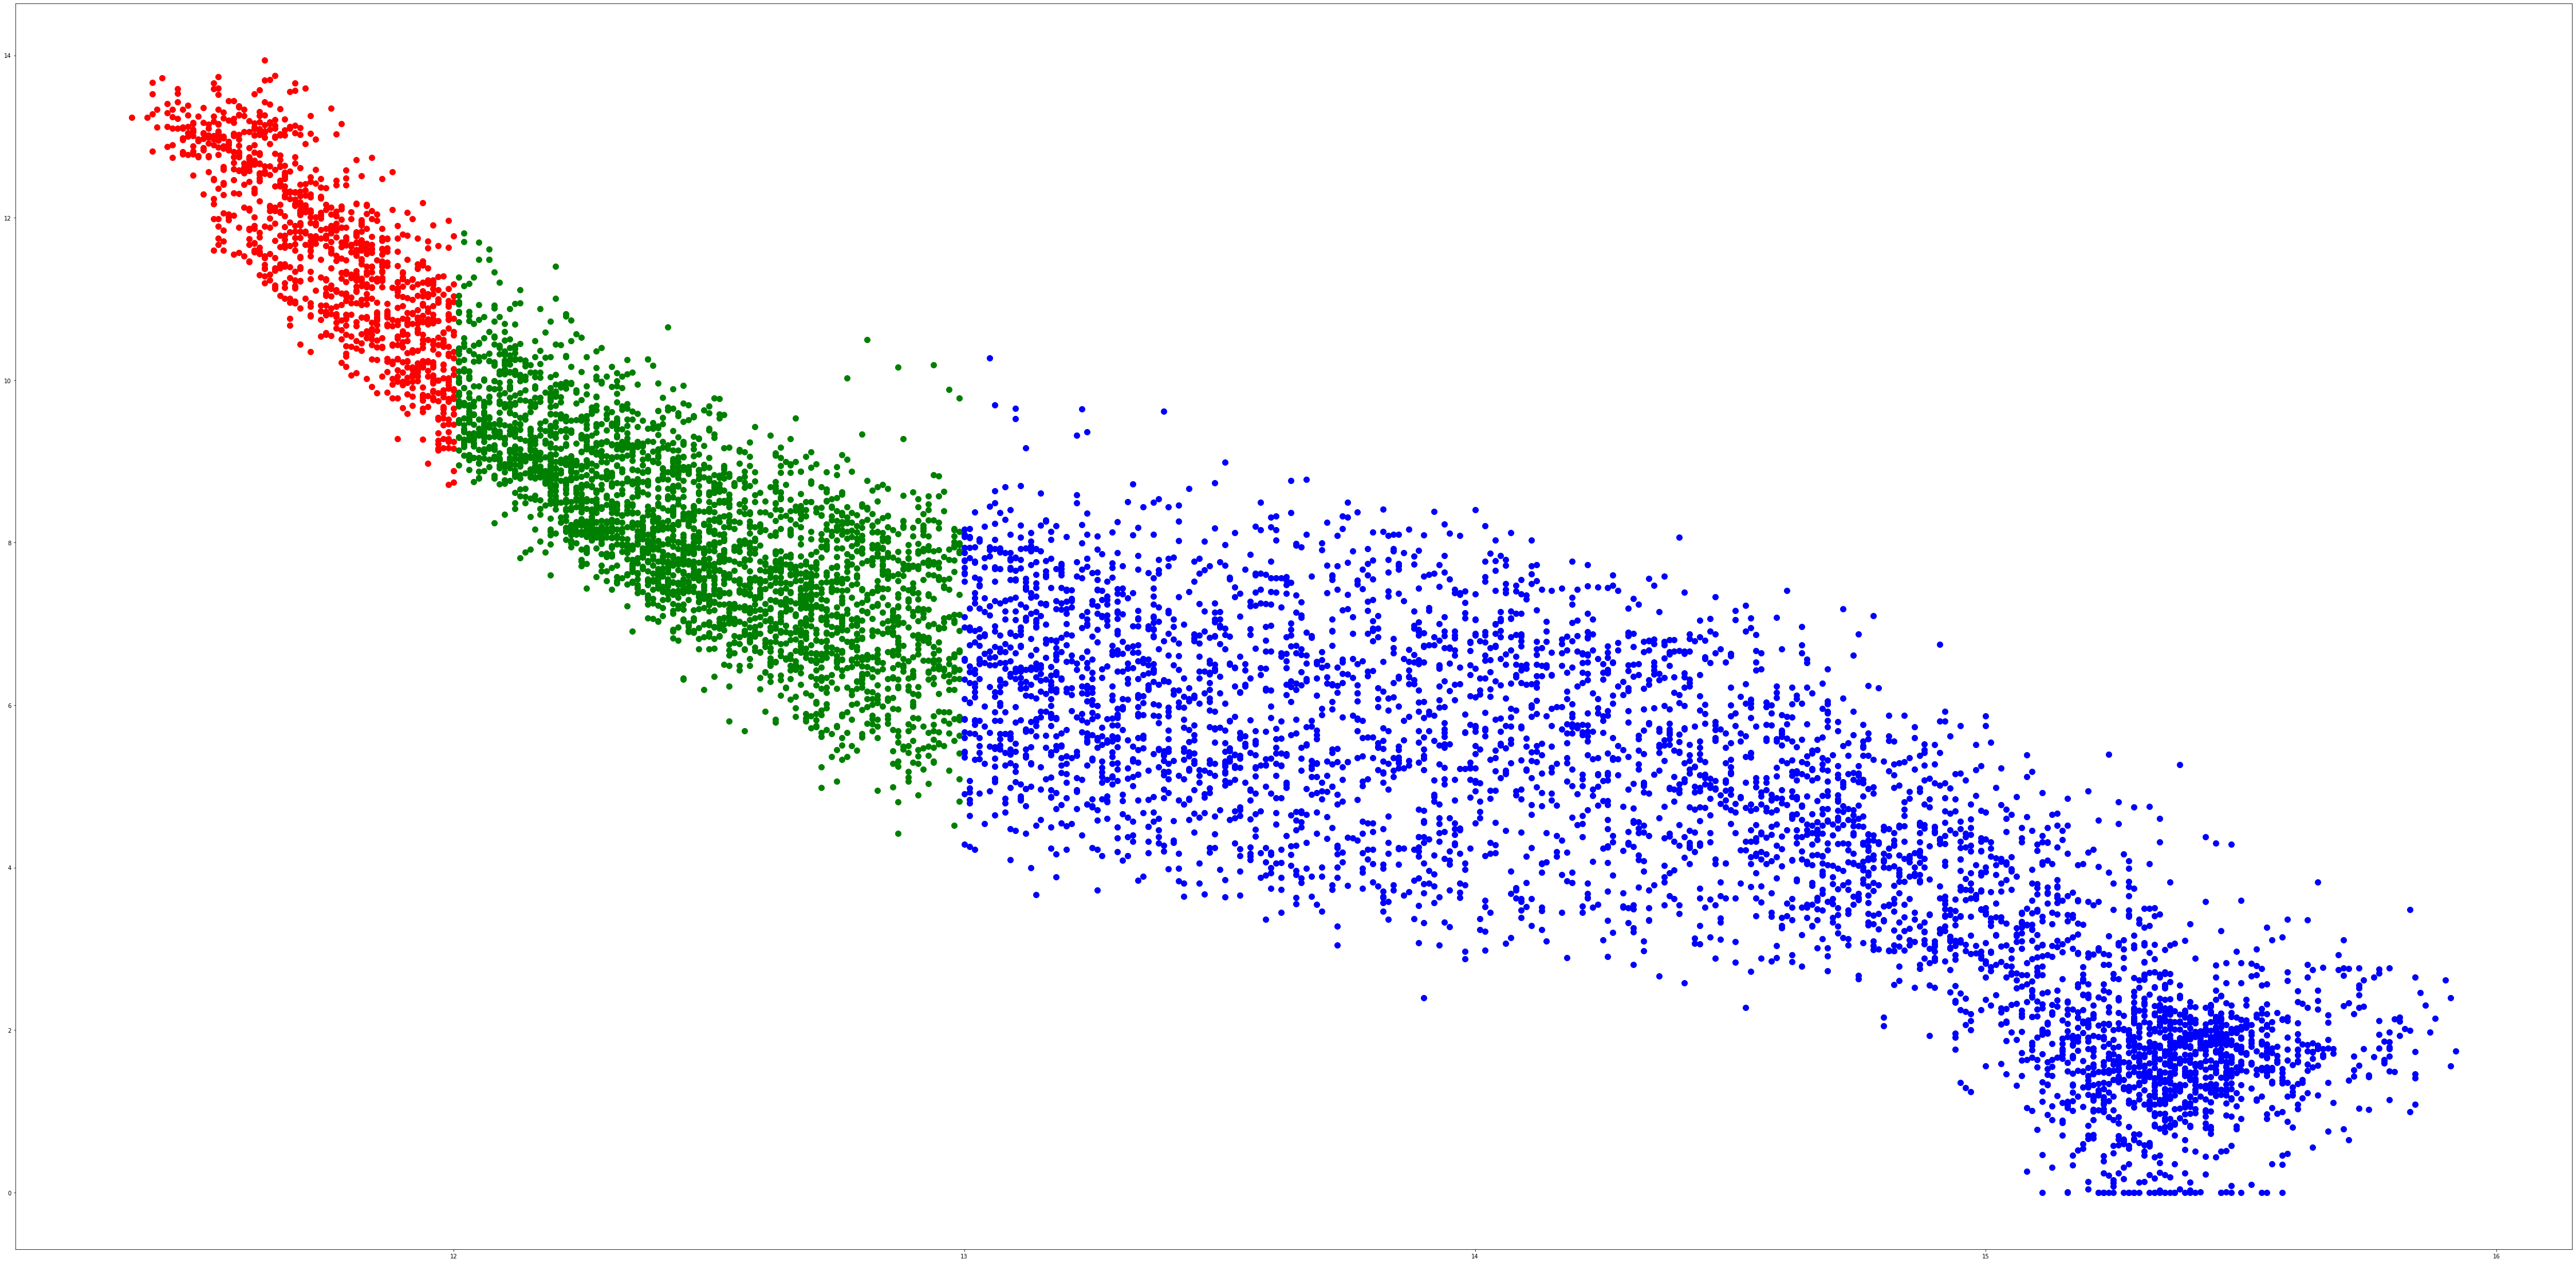

In [77]:
#@title Densidad de muestreo
df1=df.copy()
InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = "" #@param {type:"raw"}
y = "" #@param {type:"raw"}
Intervalos = "12;13" #@param {type:"string"}
Rangos=np.array(np.mat(Intervalos))

fig1, ax = plt.subplots(1, figsize=(80,40))
dfa = df1.loc[df1.loc[:,InstrumentoParametro] <= Rangos[0][0]]

dfa1= df1.loc[df1.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfa1a= dfa1.loc[dfa1.loc[:,InstrumentoParametro] > Rangos[0][0]]

dfa2= df1.loc[df1.loc[:,InstrumentoParametro] >= Rangos[1][0]]

ax.scatter(dfa.PIR161,dfa.FQI161/1000,color='red',s=100)
ax.scatter(dfa1a.PIR161,dfa1a.FQI161/1000,color='green',s=100)
ax.scatter(dfa2.PIR161,dfa2.FQI161/1000,color='blue',s=100)

Rangos



In [ ]:
#@title TREND DE PRESIÓN Y CAUDAL DEL DATASET
#Data_set = df #@param {type:"raw"}

# DEFINICION DE BARA EN COLORES

def GRAFICAR_Q (Data_set):
  
  fig, ax = plt.subplots(1, figsize=(100,30))
  fig.suptitle('CAUDAL/ PRESION DE ENTRADA SIDERCA',fontsize=30)
  q=Data_set.FQI161/1000
  p=Data_set.PIR161
  x=Data_set.Time
  Exp=1
  bar1=np.arange(len(Data_set.Date))
  ax.bar(bar1,Data_set.FQI161/1000,0.6,color="red",alpha=0.8,label="Total(FQI161)")
  ax.plot(x,p ,color="blue",label="PIR_161 entrada")
  e,=ax.plot(x,p,'o',color="black")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(1),)
  fig.autofmt_xdate()
  ax.legend(fontsize=30)
  if Exp==1:
   fig.savefig('tarmp')
  plt.show()
#________Main_____________________________________________________________
df1=df.copy()

for i in range(0,8640):
  df1.loc[i,'Time']=df.loc[i]['Date']+' '+df.loc[i]['Time']


GRAFICAR_Q(df1)
